# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [181]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [182]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [183]:
# Import the necessary CSVs to Pandas DataFrames
SFO_Data = pd.read_csv("sfo_neighborhoods_census_data.csv", index_col="year")
SFO_Data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [184]:
# Import the necessary CSVs to Pandas DataFrames
Neighborhood_Locations = pd.read_csv("neighborhoods_coordinates.csv")
Neighborhood_Locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [199]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    df_Housing_Units = SFO_Data["housing_units"].groupby("year").mean()
    Min_Units = min(df_Housing_Units)
    Max_Units = max(df_Housing_Units)
    std_Units = df_Housing_Units.std()

    Plot_df_Housing_Units= plt.bar(df_Housing_Units.index, df_Housing_Units,)
    plt.ylim((Min_Units - std_Units), (Max_Units + std_Units))
    plt.xlim(SFO_Data.index[0], SFO_Data.index[-1])
    plt.suptitle("Housing Units in San Francisco from 2010 to 2016", weight= "bold")
    plt.xlabel("Year")
    plt.ylabel("Housing Units")

    return Plot_df_Housing_Units


def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    Avg_Prices = SFO_Data[["sale_price_sqr_foot", "gross_rent"]].groupby("year").mean()
    Plot_Gross_Rent = plt.plot(Avg_Prices.index, Avg_Prices["gross_rent"])
    plt.xlim(Avg_Prices.index[0],Avg_Prices.index[-1])
    plt.suptitle("Average Gross Rent", weight="bold")
    plt.xlabel('Year')
    plt.ylabel("Gross Rent")
    
    return Plot_Gross_Rent


def average_sales_price():
    """Average Sales Price Per Year."""

    Plot_Average_Sales_Price_SqFt= plt.plot(Avg_Prices.index, Avg_Prices["sale_price_sqr_foot"])
    plt.xlim(Avg_Prices.index[0],Avg_Prices.index[-1])
    plt.suptitle("Average Sale Price per Square Foot", weight="bold")
    plt.xlabel("Year")
    plt.ylabel("Price per SqFt")

    return Plot_Average_Sales_Price_SqFt


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    Year_and_Neighborhood = SFO_Data.groupby(["year", "neighborhood"]).mean()
    Year_and_Neighborhood.reset_index(inplace=True)
    Year_and_Neighborhood.rename(columns={"level_0": "year"}, inplace=True)
    Year_and_Neighborhood.head(10)

    Plot_Year_and_Neighborhood =Year_and_Neighborhood.hvplot.line("year", "sale_price_sqr_foot", xlabel= "Year", ylabel= "Avg. Sale Price per Square Foot", groupby= "neighborhood")

    return Plot_Year_and_Neighborhood


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    Most_Expensive = SFO_Data.groupby("neighborhood").mean().sort_values(ascending=False, by="sale_price_sqr_foot").head(10)
    Most_Expensive = Most_Expensive.reset_index()

    Plot_Most_Expensive = Most_Expensive.hvplot.bar("neighborhood", "sale_price_sqr_foot", title="Top 10 Expensive Neighborhoods in SFO", xlabel="Neighborhood", ylabel="Avg. Sale Price per Square Foot", height=400, rot=90)

    return Plot_Most_Expensive


def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    Most_Expensive_Sales = SFO_Data.groupby([SFO_Data.index,"neighborhood"]).mean().reset_index()
    Most_Expensive_Sales.sort_values(["sale_price_sqr_foot","gross_rent"], inplace=True, ascending=False)

    Plot_Most_Expensive_Sales = Most_Expensive_Sales.hvplot.bar(x= "year", y=["sale_price_sqr_foot", "gross_rent"], title= "Top 10 Expensive Neighborhoods in SFO", xlabel= "Neighborhood", ylabel= "Num Housing Units", groupby= "neighborhood", rot=90, width=700, height=400) 

    return Plot_Most_Expensive_Sales
    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    df_Most_Expensive = SFO_Data.groupby("neighborhood").mean().sort_values(ascending=False, by="sale_price_sqr_foot").head(10)
    df_Most_Expensive = df_Most_Expensive.reset_index()

    Parallel_Coordinates= px.parallel_coordinates(df_Most_Expensive, color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Inferno)

    return Parallel_Coordinates

def parallel_categories():
    """Parallel Categories Plot."""
    
    df_Most_Expensive = SFO_Data.groupby("neighborhood").mean().sort_values(ascending=False, by="sale_price_sqr_foot").head(10)
    df_Most_Expensive = df_Most_Expensive.reset_index()
    
    
    Parallel_Categories= px.parallel_categories(df_Most_Expensive, color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Inferno)

    return Parallel_Categories

def neighborhood_map():
    """Neighborhood Map."""

    Most_Expensive_df= SFO_Data.groupby(by="neighborhood").mean()
    Most_Expensive_df.reset_index(inplace=True)
    Most_Expensive_df.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
    Most_Expensive_df
    
    Neighborhood_Locations = pd.read_csv("neighborhoods_coordinates.csv")

    
    All_Neighborhoods_df=pd.concat([Neighborhood_Locations,
                                Most_Expensive_df['sale_price_sqr_foot'],
                                Most_Expensive_df['housing_units'],
                                Most_Expensive_df['gross_rent']
                               ], axis=1)
 
    px.set_mapbox_access_token(map_box_api)
    map = px.scatter_mapbox(
         All_Neighborhoods_df,
        lat="Lat",
        lon="Lon",
        size="sale_price_sqr_foot",
        color="gross_rent",
        color_continuous_scale=px.colors.cyclical.IceFire,
        size_max=15,
        zoom=11,
        hover_name="Neighborhood",
        title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco",
    )
  
    plotly_panel = pn.pane.Plotly(map)
    plotly_panel._updates = True
    return plotly_panel

def sunburst():
    """Sunburst Plot."""
    
    df_Avg_Prices_Neighborhood = SFO_Data.groupby([SFO_Data.index, "neighborhood"]).mean()
    df_Avg_Prices_Neighborhood.reset_index(inplace=True)
    df_Avg_Prices_Neighborhood.rename(columns={"level_0": "year"}, inplace=True)

    df_Most_Expensive = SFO_Data.groupby("neighborhood").mean().sort_values(ascending=False, by="sale_price_sqr_foot").head(10)
    df_Most_Expensive = df_Most_Expensive.reset_index()

    df_Expensive_Neighborhoods_Per_Year = df_Avg_Prices_Neighborhood[df_Avg_Prices_Neighborhood["neighborhood"].isin(df_Most_Expensive["neighborhood"])]

    plot = px.sunburst(df_Expensive_Neighborhoods_Per_Year, path=['year','neighborhood'], color='gross_rent', color_continuous_scale='RdBu')


    return plot

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [200]:
# Create a Title for the Dashboard
title = pn.pane.Markdown(
    """
# Real Estate Analysis of San Francisco from 2010 to 2016
""",
    width=800,
)
welcome = pn.pane.Markdown(
    """
This dashboard presents a visual analysis of historical prices of house units,
sale price per square foot and gross rent in San Francisco, California
from 2010 to 2016.
You can navigate through the tabs above to explore
more details about the evolution of the real estate market on
The Golden City across these years.
"""
)

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



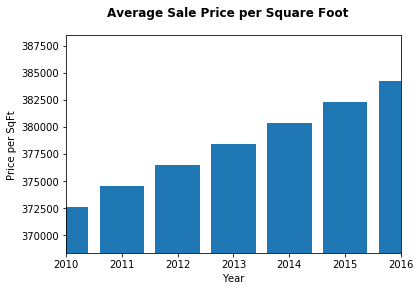

In [201]:
Welcome_Column = pn.Column(welcome, neighborhood_map())
Market_Column = pn.Column(housing_units_per_year(), average_gross_rent(), average_sales_price())
Neighborhood_Column = pn.Column(average_price_by_neighborhood(), top_most_expensive_neighborhoods())
Parallel_Plots_Column = pn.Column(parallel_coordinates(), parallel_categories(), width=960)
Sunburst_Column = pn.Column(sunburst())

In [188]:
# Create a tab layout for the dashboard 
dashboard = pn.Tabs(("Welcome", Welcome_Column), 
("Yearly Market Analysis", Market_Column), 
("Neighborhood Analysis", Neighborhood_Column), 
("Parallel Plots Analysis", Parallel_Plots_Column), 
("Sunburst Plot Analysis", Sunburst_Column))

## Serve the Panel Dashboard

In [189]:
# Serve the# dashboard
dashboard.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Column
        [0] Str(BarContainer)
        [1] Str(list)
        [2] Str(list)
    [2] Column
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [1] HoloViews(Bars)
    [3] Column(width=960)
        [0] Plotly(Figure, visible=False)
        [1] Plotly(Figure, visible=False)
    [4] Column
        [0] Plotly(Figure, visible=False)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

Text(0, 0.5, 'Housing Units')

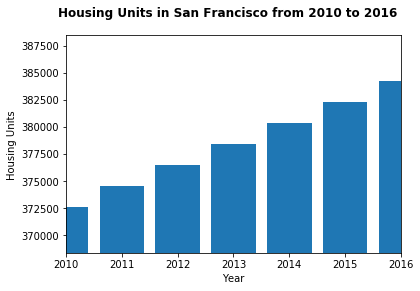

In [190]:
# housing_units_per_year()
Plot_df_Housing_Units= plt.bar(df_Housing_Units.index, df_Housing_Units,)
plt.ylim((Min_Units - std_Units), (Max_Units + std_Units))
plt.xlim(SFO_Data.index[0], SFO_Data.index[-1])
plt.suptitle("Housing Units in San Francisco from 2010 to 2016", weight= "bold")
plt.xlabel("Year")
plt.ylabel("Housing Units")

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



Text(0, 0.5, 'Gross Rent')

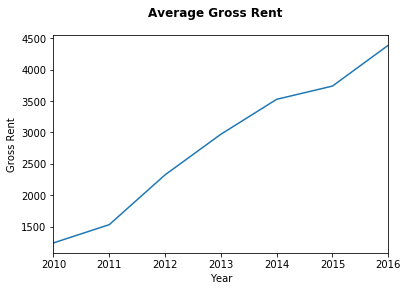

In [191]:
# average_gross_rent()
Plot_Gross_Rent = plt.plot(Avg_Prices.index, Avg_Prices["gross_rent"])
plt.xlim(Avg_Prices.index[0],Avg_Prices.index[-1])
plt.suptitle("Average Gross Rent", weight="bold")
plt.xlabel('Year')
plt.ylabel("Gross Rent")

Text(0, 0.5, 'Price per SqFt')

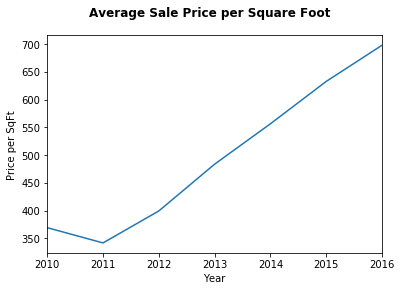

In [192]:
# average_sales_price()
Plot_Average_Sales_Price_SqFt= plt.plot(Avg_Prices.index, Avg_Prices["sale_price_sqr_foot"])
plt.xlim(Avg_Prices.index[0],Avg_Prices.index[-1])
plt.suptitle("Average Sale Price per Square Foot", weight="bold")
plt.xlabel("Year")
plt.ylabel("Price per SqFt")

In [193]:
# average_price_by_neighborhood()
Year_and_Neighborhood = SFO_Data.groupby(["year", "neighborhood"]).mean()
Year_and_Neighborhood.reset_index(inplace=True)
Year_and_Neighborhood.rename(columns={"level_0": "year"}, inplace=True)
Year_and_Neighborhood.head(10)
Plot_Year_and_Neighborhood =Year_and_Neighborhood.hvplot.line("year", "sale_price_sqr_foot", xlabel= "Year", ylabel= "Avg. Sale Price per Square Foot", groupby= "neighborhood")
Year_and_Neighborhood.hvplot.line("year", "sale_price_sqr_foot", xlabel= "Year", ylabel= "Avg. Sale Price per Square Foot", groupby= "neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [194]:
# top_most_expensive_neighborhoods()
Most_Expensive = SFO_Data.groupby("neighborhood").mean().sort_values(ascending=False, by="sale_price_sqr_foot").head(10)
Most_Expensive = Most_Expensive.reset_index()

Plot_Most_Expensive = Most_Expensive.hvplot.bar("neighborhood", "sale_price_sqr_foot", title="Top 10 Expensive Neighborhoods in SFO", xlabel="Neighborhood", ylabel="Avg. Sale Price per Square Foot", height=400, rot=90)
Most_Expensive.hvplot.bar("neighborhood", "sale_price_sqr_foot", title="Top 10 Expensive Neighborhoods in SFO", xlabel="Neighborhood")


:Bars   [neighborhood]   (sale_price_sqr_foot)

In [195]:
# most_expensive_neighborhoods_rent_sales()
Most_Expensive_Sales = SFO_Data.groupby([SFO_Data.index,"neighborhood"]).mean().reset_index()
Most_Expensive_Sales.sort_values(["sale_price_sqr_foot","gross_rent"], inplace=True, ascending=False)

Plot_Most_Expensive_Sales = Most_Expensive_Sales.hvplot.bar(x= "year", y=["sale_price_sqr_foot", "gross_rent"], title= "Top 10 Expensive Neighborhoods in SFO", xlabel= "Neighborhood", ylabel= "Num Housing Units", groupby= "neighborhood", rot=90, width=700, height=400) 

Most_Expensive_Sales.hvplot.bar(x= "year", y=["sale_price_sqr_foot", "gross_rent"], title= "Top 10 Expensive Neighborhoods in SFO", xlabel= "Neighborhood", ylabel= "Num Housing Units", groupby= "neighborhood", rot=90, width=700, height=400) 


:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

In [196]:
# parallel_coordinates()
df_Most_Expensive = SFO_Data.groupby("neighborhood").mean().sort_values(ascending=False, by="sale_price_sqr_foot").head(10)
df_Most_Expensive = df_Most_Expensive.reset_index()

Parallel_Coordinates= px.parallel_coordinates(df_Most_Expensive, color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Inferno)
px.parallel_coordinates(df_Most_Expensive, color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Inferno)


In [178]:
# parallel_categories()
df_Most_Expensive = SFO_Data.groupby("neighborhood").mean().sort_values(ascending=False, by="sale_price_sqr_foot").head(10)
df_Most_Expensive = df_Most_Expensive.reset_index()


Parallel_Categories= px.parallel_categories(df_Most_Expensive, color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Inferno)
px.parallel_categories(df_Most_Expensive, color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Inferno)


In [197]:
# neighborhood_map().show()

Most_Expensive_df= SFO_Data.groupby(by="neighborhood").mean()
Most_Expensive_df.reset_index(inplace=True)
Most_Expensive_df.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
Most_Expensive_df

Neighborhood_Locations = pd.read_csv("neighborhoods_coordinates.csv")


All_Neighborhoods_df=pd.concat([Neighborhood_Locations,
                            Most_Expensive_df['sale_price_sqr_foot'],
                            Most_Expensive_df['housing_units'],
                            Most_Expensive_df['gross_rent']
                           ], axis=1)

px.set_mapbox_access_token(map_box_api)
map = px.scatter_mapbox(
     All_Neighborhoods_df,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    hover_name="Neighborhood",
    title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco",
)
map.show()

In [198]:
# sunburst()

df_Avg_Prices_Neighborhood = SFO_Data.groupby([SFO_Data.index, "neighborhood"]).mean()
df_Avg_Prices_Neighborhood.reset_index(inplace=True)
df_Avg_Prices_Neighborhood.rename(columns={"level_0": "year"}, inplace=True)

df_Most_Expensive = SFO_Data.groupby("neighborhood").mean().sort_values(ascending=False, by="sale_price_sqr_foot").head(10)
df_Most_Expensive = df_Most_Expensive.reset_index()

df_Expensive_Neighborhoods_Per_Year = df_Avg_Prices_Neighborhood[df_Avg_Prices_Neighborhood["neighborhood"].isin(df_Most_Expensive["neighborhood"])]

px.sunburst(df_Expensive_Neighborhoods_Per_Year, path=['year','neighborhood'], color='gross_rent', color_continuous_scale='RdBu')
